# 🎬 Netflix Data: Cleaning, Analysis and Visualization

| Field | Details |
|-------|--------|
| **Project Title** | Netflix Data: Cleaning, Analysis and Visualization |
| **Tools** | Python, Pandas, Matplotlib, Seaborn, WordCloud, SQL |
| **Domain** | Data Analyst & Data Scientist |
| **Difficulty** | Intermediate |

---

## 📌 Objective
Analyze Netflix content data (2008–2021) to uncover trends in content type, ratings, genres, countries, and release patterns using Python data analysis and visualization libraries.

---

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Plot styling
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')
sns.set_palette('Set2')

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


## Step 2: Load the Dataset

In [2]:
# Load dataset
# Download from: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies
data = pd.read_csv('netflix1.csv')

print(f'Shape: {data.shape}')
print(f'Columns: {list(data.columns)}')
data.head()

Shape: (8790, 10)
Columns: ['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Statistical summary
data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


## Step 3: Data Cleaning

In [5]:
# Check for missing values
print('Missing Values:')
print(data.isnull().sum())
print(f'\nNull percentage:')
print((data.isnull().sum() / len(data) * 100).round(2))

Missing Values:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Null percentage:
show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64


In [6]:
# Remove duplicates
before = len(data)
data.drop_duplicates(inplace=True)
after = len(data)
print(f'Duplicates removed: {before - after}')
print(f'Remaining records: {after}')

Duplicates removed: 0
Remaining records: 8790


In [7]:
# Convert date_added to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract temporal features
data['year']  = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day']   = data['date_added'].dt.day

print('Date conversion complete!')
data[['date_added', 'year', 'month', 'day']].head()

Date conversion complete!


,date_added,year,month,day
0,2021-09-25,2021,9,25
1,2021-09-24,2021,9,24
2,2021-09-24,2021,9,24
3,2021-09-22,2021,9,22
4,2021-09-24,2021,9,24


## Step 4: Exploratory Data Analysis (EDA)

### 4.1 Content Type Distribution

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


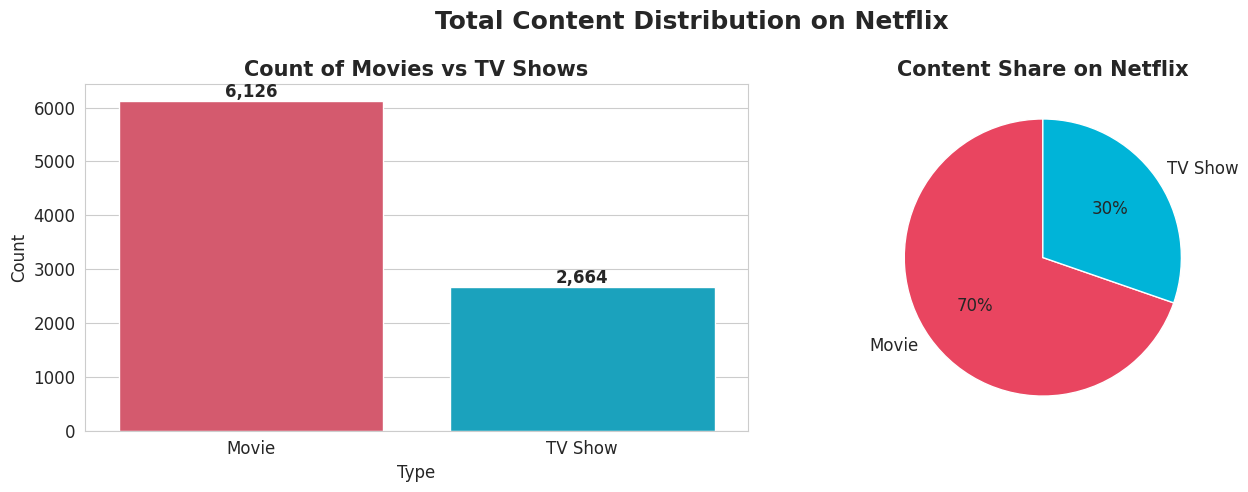

In [8]:
# Count Movies vs TV Shows
type_counts = data['type'].value_counts()
print(type_counts)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
sns.countplot(data=data, x='type', palette=['#E94560', '#00B4D8'], ax=axes[0])
axes[0].set_title('Count of Movies vs TV Shows', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontweight='bold', fontsize=12)

# Pie chart
axes[1].pie(type_counts.values, labels=type_counts.index,
            autopct='%.0f%%', colors=['#E94560', '#00B4D8'],
            startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Content Share on Netflix', fontsize=15, fontweight='bold')

plt.suptitle('Total Content Distribution on Netflix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('netflix_content_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.2 Rating Analysis

      rating  count
0      TV-MA   3205
1      TV-14   2157
2      TV-PG    861
3          R    799
4      PG-13    490
5      TV-Y7    333
6       TV-Y    306
7         PG    287
8       TV-G    220
9         NR     79
10         G     41
11  TV-Y7-FV      6
12     NC-17      3
13        UR      3


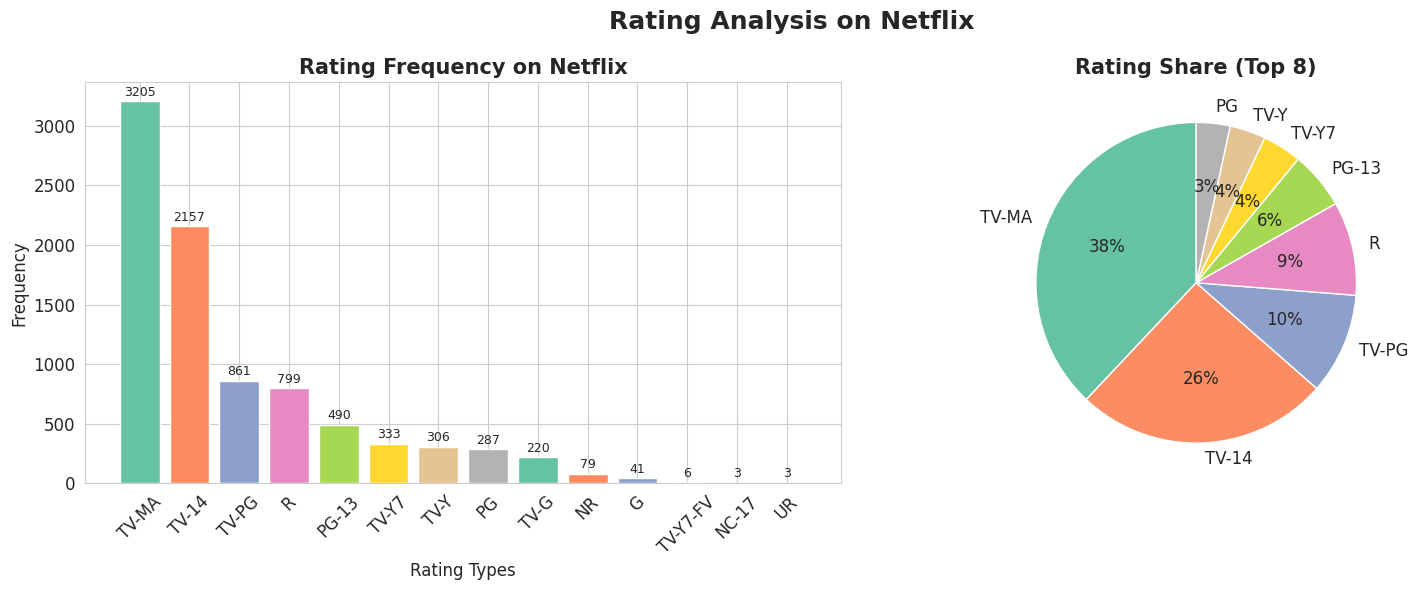

In [9]:
# Rating frequency
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
print(ratings)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
bars = axes[0].bar(ratings['rating'], ratings['count'],
                   color=sns.color_palette('Set2', len(ratings)))
axes[0].set_xlabel('Rating Types', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Rating Frequency on Netflix', fontsize=15, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars, ratings['count']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                 str(count), ha='center', va='bottom', fontsize=9)

# Pie chart (top 8)
top8 = ratings.head(8)
axes[1].pie(top8['count'], labels=top8['rating'],
            autopct='%.0f%%', startangle=90,
            colors=sns.color_palette('Set2', 8))
axes[1].set_title('Rating Share (Top 8)', fontsize=15, fontweight='bold')

plt.suptitle('Rating Analysis on Netflix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('netflix_ratings.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.3 Top 10 Countries with Most Content

          country  count
0   United States   3240
1           India   1057
2  United Kingdom    638
3        Pakistan    421
4       Not Given    287
5          Canada    271
6           Japan    259
7     South Korea    214
8          France    213
9           Spain    182


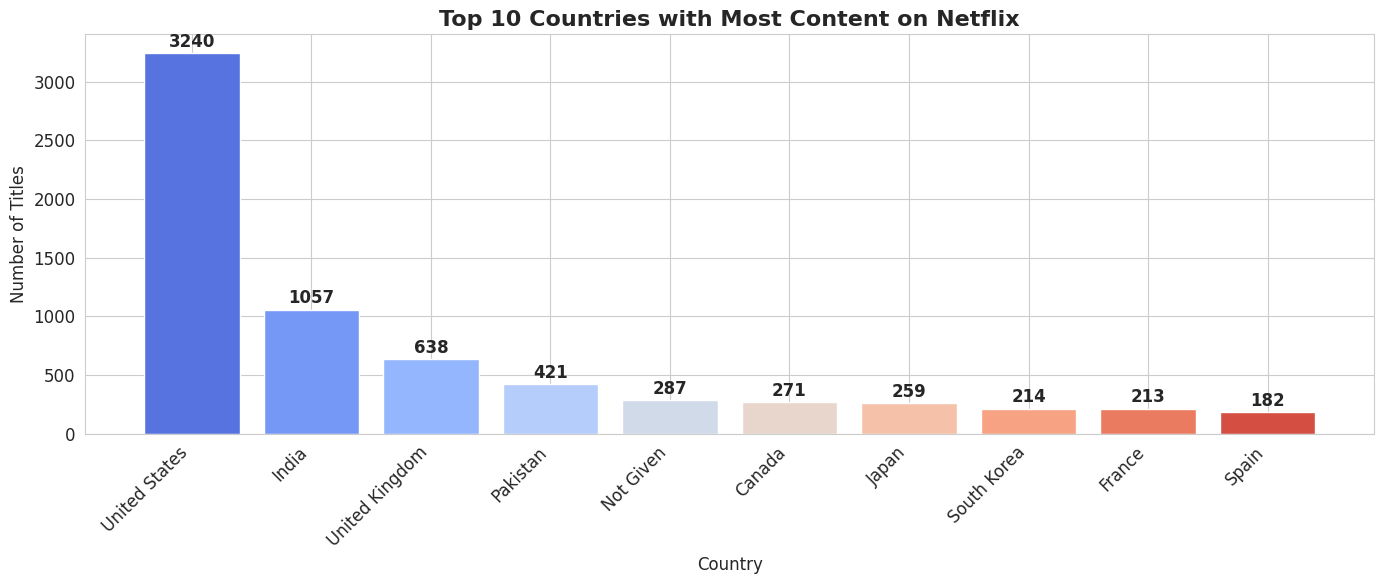

In [10]:
top_countries = (data['country'].value_counts()
                 .reset_index()
                 .head(10))
top_countries.columns = ['country', 'count']
print(top_countries)

plt.figure(figsize=(14, 6))
bars = plt.bar(top_countries['country'], top_countries['count'],
               color=sns.color_palette('coolwarm', 10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16, fontweight='bold')
for bar, count in zip(bars, top_countries['count']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             str(count), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('netflix_top_countries.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.4 Monthly Release Patterns

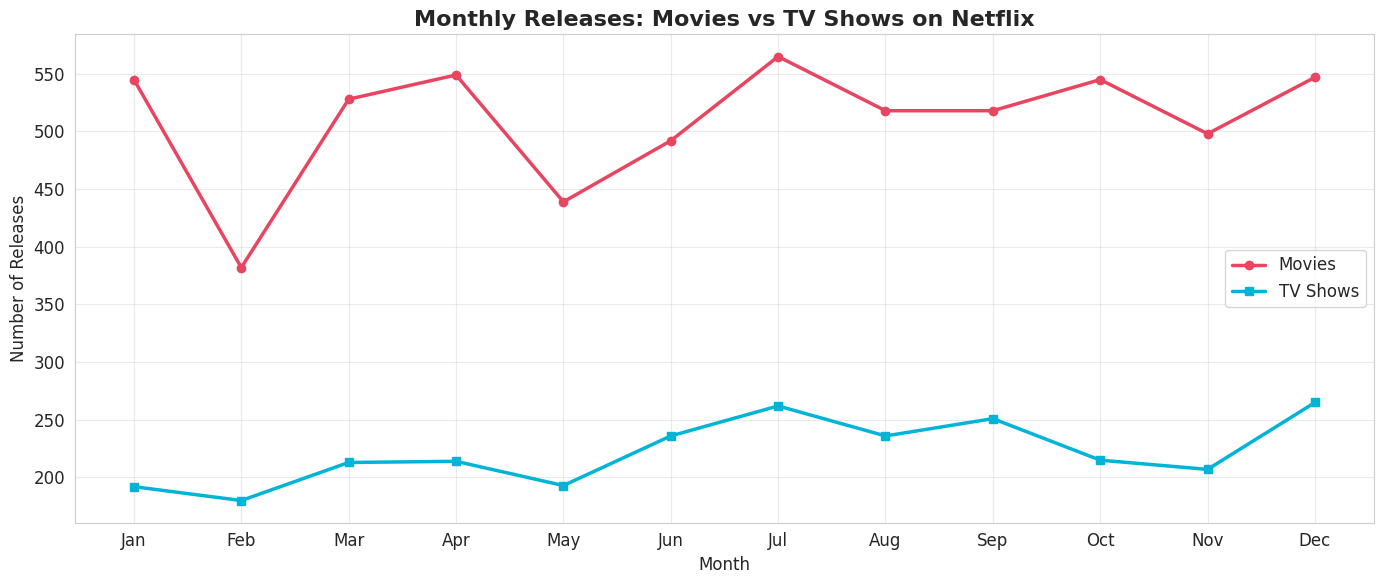

In [11]:
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

monthly_movies = (data[data['type']=='Movie']['month']
                  .value_counts().sort_index())
monthly_shows  = (data[data['type']=='TV Show']['month']
                  .value_counts().sort_index())

plt.figure(figsize=(14, 6))
plt.plot(monthly_movies.index, monthly_movies.values,
         marker='o', linewidth=2.5, color='#E94560', label='Movies')
plt.plot(monthly_shows.index, monthly_shows.values,
         marker='s', linewidth=2.5, color='#00B4D8', label='TV Shows')
plt.xticks(range(1, 13), month_labels)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.title('Monthly Releases: Movies vs TV Shows on Netflix', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('netflix_monthly_releases.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.5 Yearly Release Trends

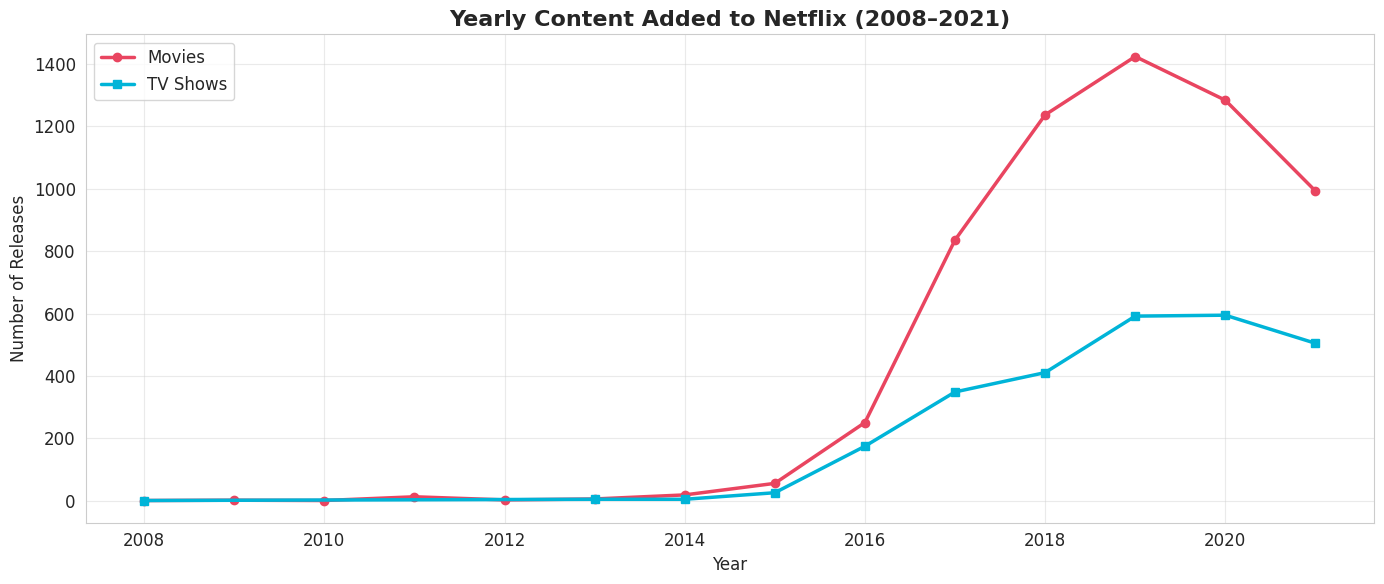

In [12]:
yearly_movies = (data[data['type']=='Movie']['year']
                 .value_counts().sort_index())
yearly_shows  = (data[data['type']=='TV Show']['year']
                 .value_counts().sort_index())

plt.figure(figsize=(14, 6))
plt.plot(yearly_movies.index, yearly_movies.values,
         marker='o', linewidth=2.5, color='#E94560', label='Movies')
plt.plot(yearly_shows.index, yearly_shows.values,
         marker='s', linewidth=2.5, color='#00B4D8', label='TV Shows')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.title('Yearly Content Added to Netflix (2008–2021)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('netflix_yearly_trends.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.6 Top 10 Genres — Movies & TV Shows

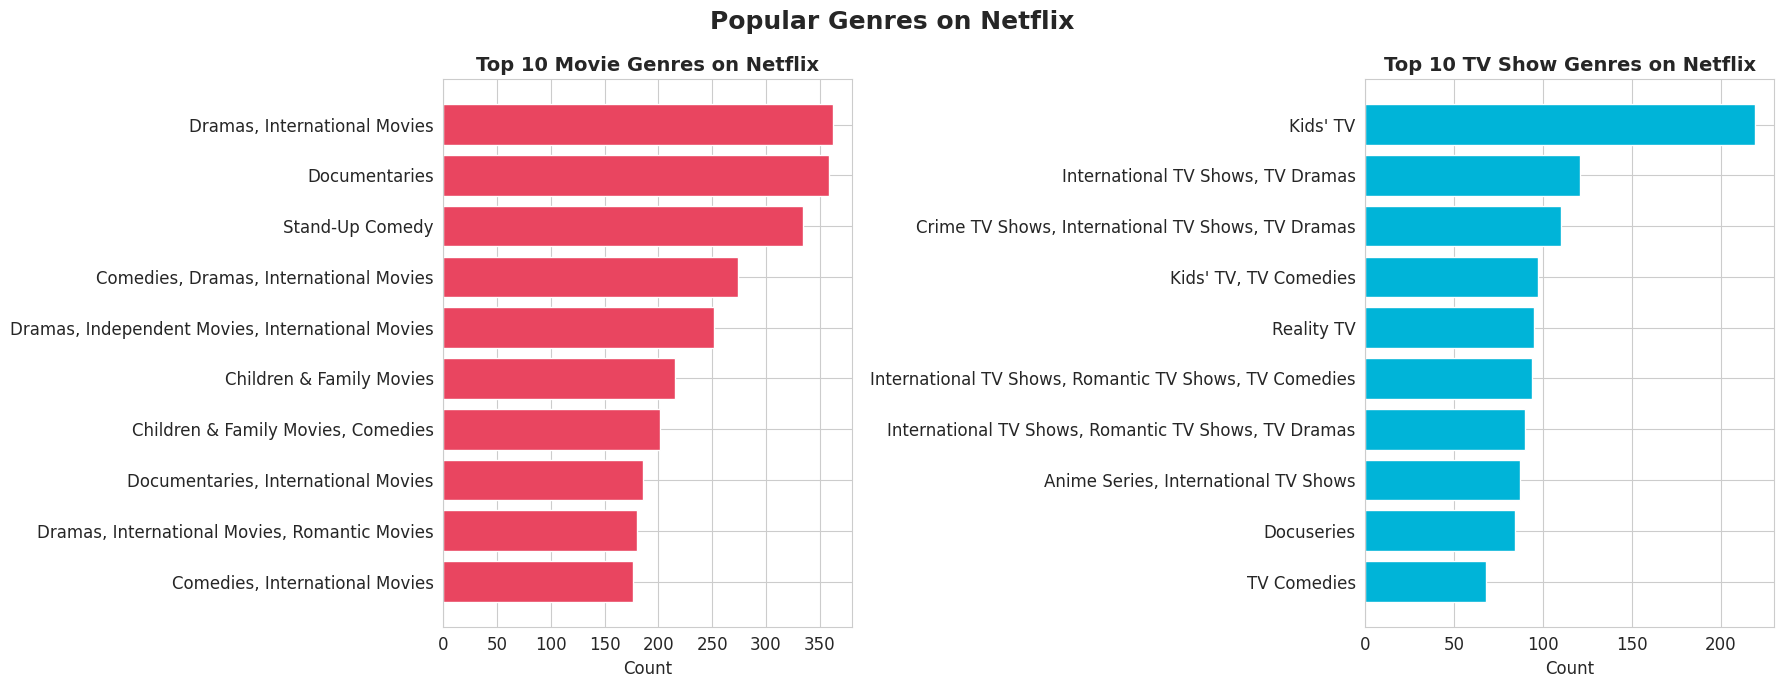

In [13]:
movie_genres  = (data[data['type']=='Movie']
                 .groupby('listed_in').size()
                 .sort_values(ascending=False).head(10))
series_genres = (data[data['type']=='TV Show']
                 .groupby('listed_in').size()
                 .sort_values(ascending=False).head(10))

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[0].barh(movie_genres.index[::-1], movie_genres.values[::-1],
             color='#E94560')
axes[0].set_title('Top 10 Movie Genres on Netflix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')

axes[1].barh(series_genres.index[::-1], series_genres.values[::-1],
             color='#00B4D8')
axes[1].set_title('Top 10 TV Show Genres on Netflix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count')

plt.suptitle('Popular Genres on Netflix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('netflix_genres.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.7 Top 15 Directors

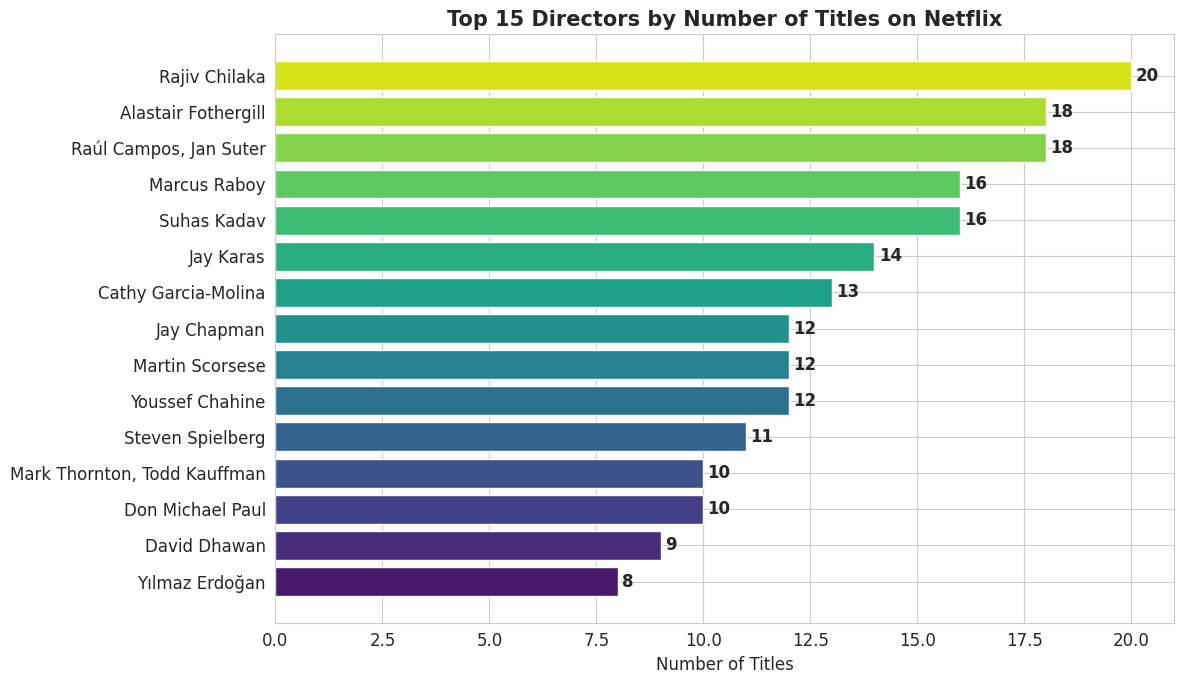

In [14]:
directors = (data['director'].value_counts()
             .reset_index()
             .iloc[1:16])  # skip index 0 (often 'Not Given')
directors.columns = ['director', 'count']

plt.figure(figsize=(12, 7))
bars = plt.barh(directors['director'][::-1], directors['count'][::-1],
                color=sns.color_palette('viridis', 15))
plt.xlabel('Number of Titles', fontsize=12)
plt.title('Top 15 Directors by Number of Titles on Netflix',
          fontsize=15, fontweight='bold')
for bar, count in zip(bars, directors['count'][::-1]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('netflix_directors.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.8 Word Cloud of Movie Titles

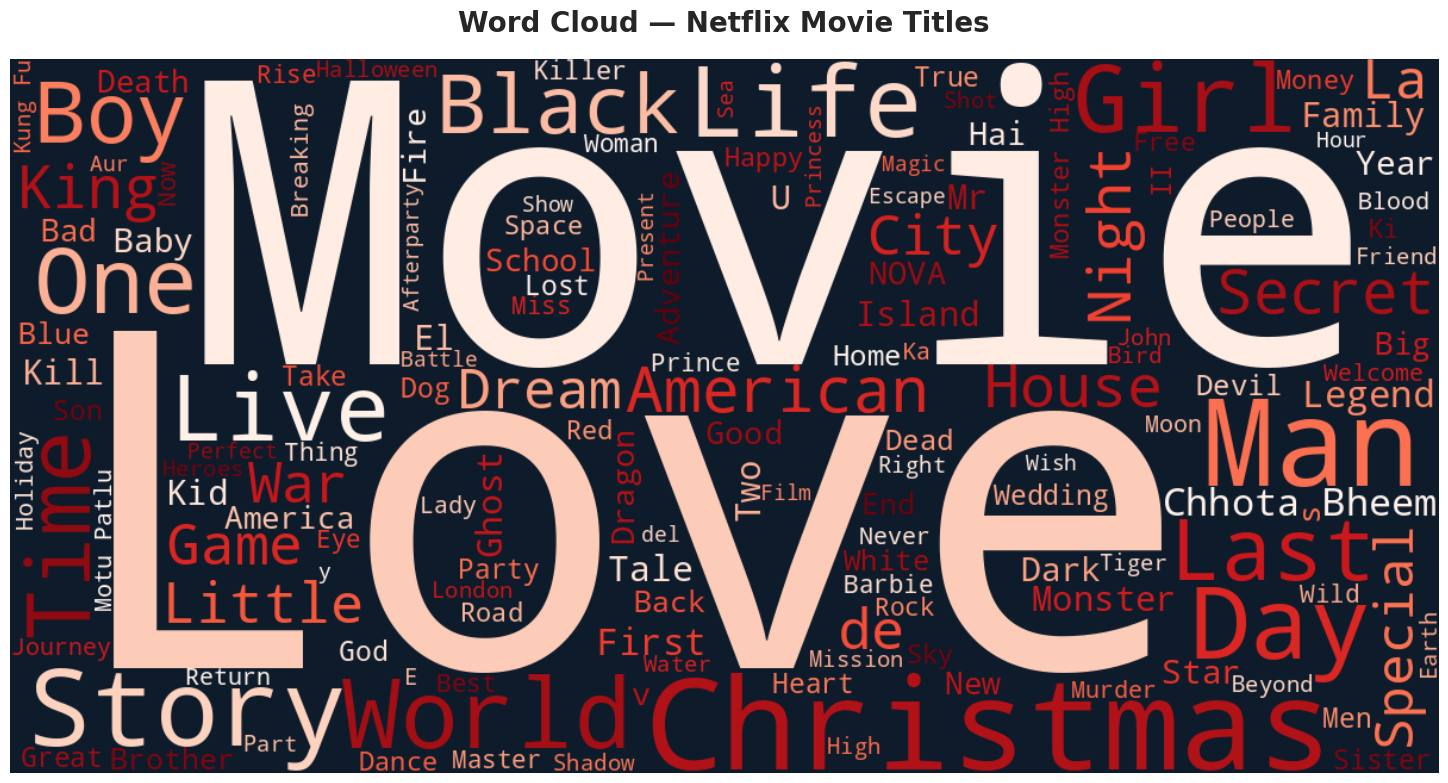

In [15]:
movie_titles = data[data['type'] == 'Movie']['title']
text = ' '.join(movie_titles.dropna())

wordcloud = WordCloud(
    width=1200, height=600,
    background_color='#0D1B2A',
    colormap='Reds',
    max_words=150
).generate(text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Netflix Movie Titles', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('netflix_wordcloud.png', dpi=150, bbox_inches='tight')
plt.show()

## Step 5: Key Insights & Conclusions

---

| # | Insight |
|---|--------|
| 1 | 📺 Netflix library is **70% Movies** and **30% TV Shows** |
| 2 | 🔞 **TV-MA** is the dominant rating — content skews toward adult audiences |
| 3 | 🇺🇸 **USA leads** with 3,240 titles — nearly 3× India (2nd place) |
| 4 | 📈 Content grew **exponentially from 2015–2019**, peaking in 2019 |
| 5 | 📅 **July** sees the highest monthly releases for both Movies & TV Shows |
| 6 | 🎭 **Dramas & International** content dominate the movie genre list |
| 7 | 👨‍🎬 **Rajiv Chilaka** is the most prolific director on Netflix with 20 titles |

---

## Step 6: Next Steps

- **Feature Engineering**: Count genres per title, extract duration in minutes
- **Machine Learning**: Build a content recommendation model
- **SQL Analysis**: Query patterns using PostgreSQL
- **Dashboard**: Build interactive Tableau or Power BI dashboard

---
*Project by: Unified Mentor Internship Program*